In [2]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 92.5 MB/s eta 0:00:00


# Binary symmetric channel



*   the probability we will receive the wrong bit is $p$
*   the probability $1 - p$ nothing happens to our bit



**stochastic matrix**

$$M = \begin{bmatrix}
    1-p     & p  \\
    p       & 1-p \\
\end{bmatrix}$$

Decrease the error probability:

**encoding**: $0_L = 000$, $1_L=111$

* no error with probability $(1 - p)^3$
* one error occurs on the bits with $3(1 - p)^2 p$
* two error occur on the bits $3(1 - p)p^2$
* three error  on the bits $p^3$

Assuming $p$ is small.

**decoding**:

* $\{000, 001, 010, 100\} → 0$
* $\{111, 110, 101, 011\} → 1$

The probability that the procedure above fails: $3(1 - p)p^2 + p^3 = 3p^2 - 2p^3$.

The probability of failing to send our bit is decreased if $3p^2 - 2p^3<p$


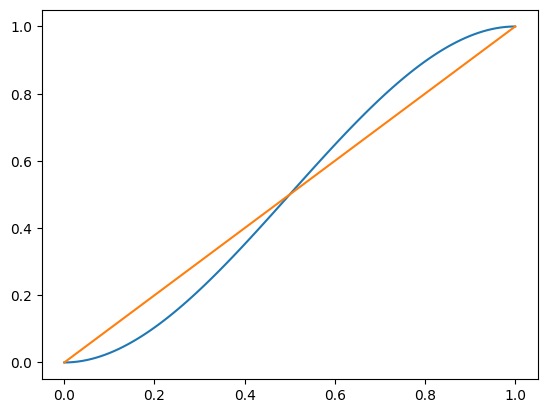

In [7]:
import matplotlib.pyplot as plt
import numpy as np

p = np.linspace(0,1,100)
plt.plot(p, 3*p**2-2*p**3)
plt.plot(p, p)
plt.show()

We decreased the failing probability from $p$ to $3p^2 - 2p^3$.

# Quantum error correction

* **no cloning theorem**
* **Measurement**
* **quantum noise**

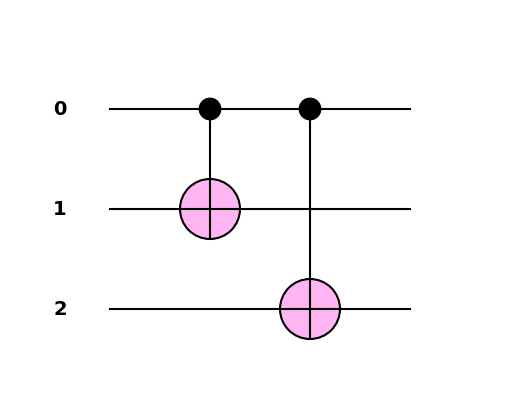

In [8]:
import pennylane as qml

def circ():
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [0,2])
    return 0 #qml.probs(wires=[0,1,2])


qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(circ)()


$$\psi = \alpha |0\rangle + \beta |1\rangle \rightarrow  \alpha |000\rangle + \beta |111\rangle$$

**encoding:** $|0\rangle_L = |000\rangle$, $|1\rangle_L = |111\rangle$

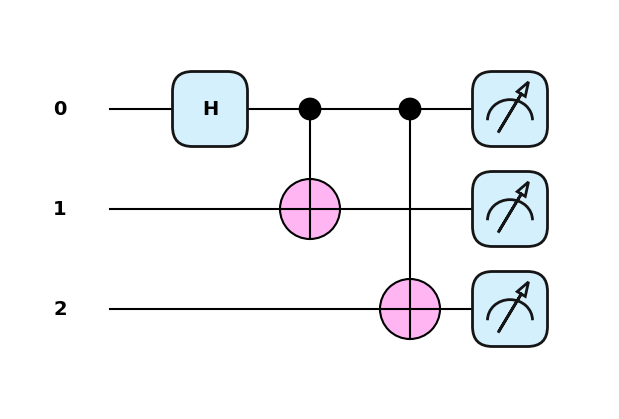

In [ ]:
dev = qml.device("default.mixed", wires=3)

@qml.qnode(dev)
def circ():
    qml.Hadamard(0)
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [0,2])
    return qml.probs(wires=[0,1,2])

qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(circ)()

results = qml.snapshots(circ)()['execution_results']

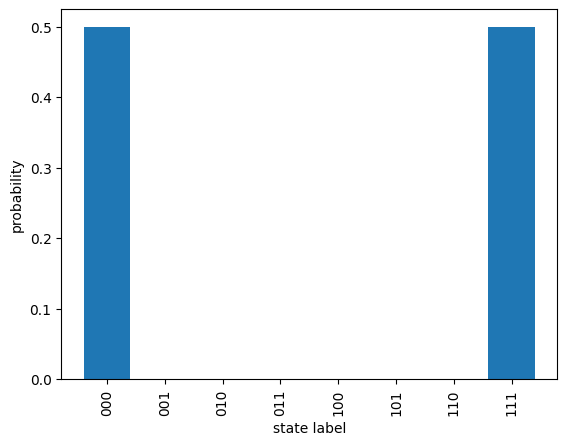

In [ ]:
bit_strings = [f"{i:0{3}b}" for i in range(8)]
bit_strings

import matplotlib.pyplot as plt

plt.bar(bit_strings, results)

plt.xticks(rotation='vertical')
plt.xlabel('state label')
plt.ylabel("probability")

plt.show()

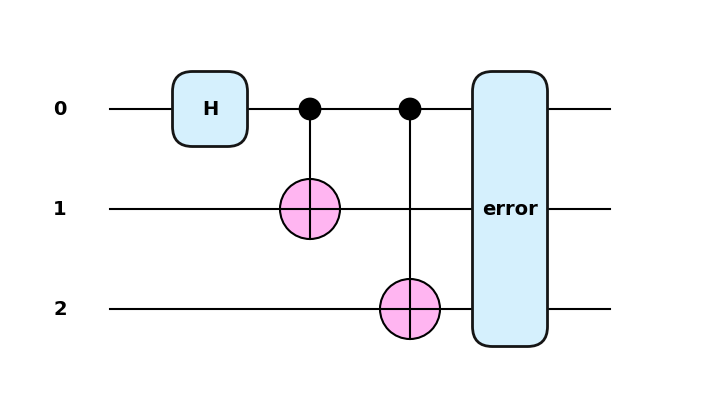

In [7]:
class error(qml.QFT):
    pass

def circ():
    qml.Hadamard(0)
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [0,2])
    op = error(wires=[0,1,2])
    return 0

qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(circ)()


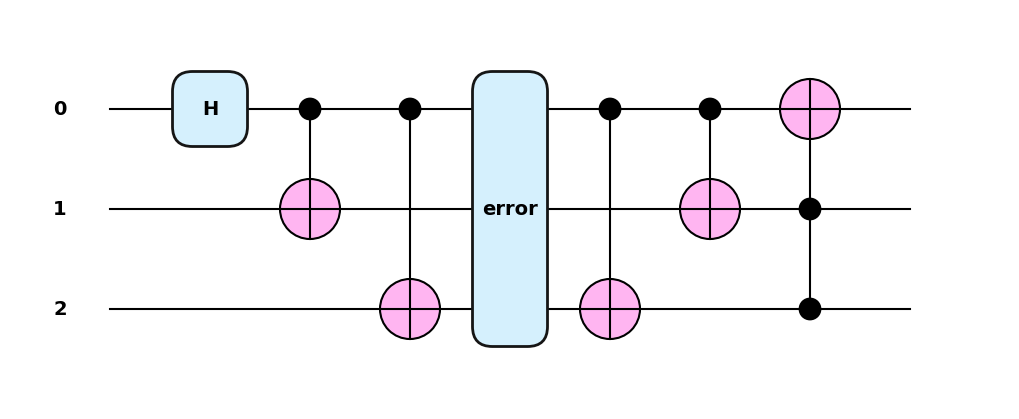

In [12]:

def circ():
    qml.Hadamard(0)
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [0,2])
    op = error(wires=[0,1,2])
    qml.CNOT(wires = [0,2])
    qml.CNOT(wires = [0,1])
    qml.Toffoli(wires = [2,1,0])
    return 0

qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(circ)()


True


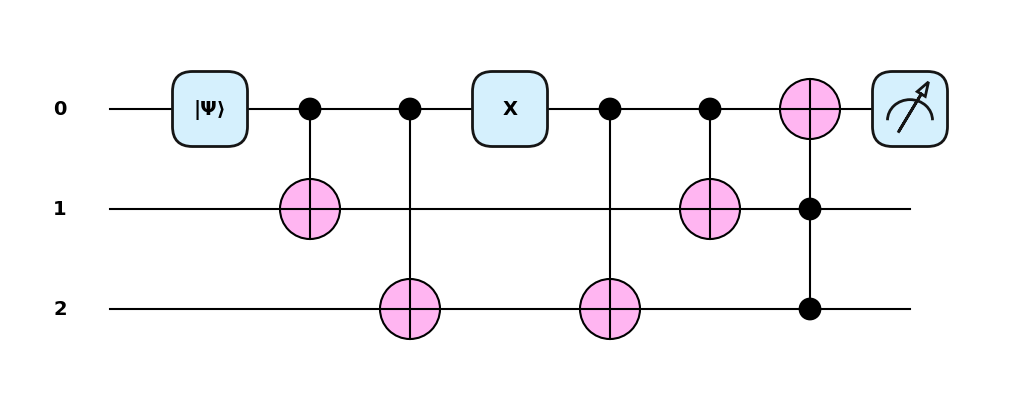

In [25]:
dev = qml.device("default.mixed", wires=3)

@qml.qnode(dev)
def circ(state):
    qml.StatePrep(state, wires=0) # initial state
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [0,2])
    qml.X(wires = [0])
    qml.CNOT(wires = [0,2])
    qml.CNOT(wires = [0,1])
    qml.Toffoli(wires = [2,1,0])
    return qml.density_matrix(wires=[0])

# random initial state
psi_init = np.random.random(2) + 1j * np.random.random(2)
psi_init = psi_init/np.linalg.norm(psi_init)
rho_init = np.outer(psi_init, np.conj(psi_init)) # density matrix

rho_out = circ(psi_init)

print(np.allclose(rho_out, rho_init))

qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(circ)(psi_init)

# the evolution of the state

$$\rho \otimes |0\rangle\langle 0|\otimes |0\rangle\langle 0| \rightarrow \\
(1-p)^3\rho \otimes |0\rangle\langle 0|\otimes |0\rangle\langle 0|+p(1-p)^2\rho \otimes |0\rangle\langle 0|\otimes |1\rangle\langle 1|+p(1-p)^2\rho \otimes |1\rangle\langle 1|\otimes |0\rangle\langle 0|+p(1-p)^2 X\rho X\otimes |0\rangle\langle 0|\otimes |0\rangle\langle 0|\\+
p^2(1-p)X\rho X \otimes |0\rangle\langle 0|\otimes |1\rangle\langle 1|+p^2(1-p)X\rho X \otimes |1\rangle\langle 1|\otimes |0\rangle\langle 0|+p^2(1-p)\rho  \otimes |1\rangle\langle 1|\otimes |1\rangle\langle 1|\\+p^3X\rho X \otimes |1\rangle\langle 1|\otimes |1\rangle\langle 1|
$$

# the partial trace over the 2nd and 3rd qubits

$$\rho → \left[(1-p)^3+3p(1-p)^2\right]\rho+\left[3p^2(1-p)+p^3\right] X\rho X$$

# the evolution without encoding

$$\rho \rightarrow (1-p)\rho+ p X\rho X $$

if $p<0.5$ encoding preserves state better

# Fidelity

* definition: $$F(\rho, \sigma) = \mbox{Tr}\left[\sqrt{\sqrt{\rho}\sigma\sqrt{\rho}}\right]$$

* if one of the states is pure: $$F(\psi, \rho)=\sqrt{\langle \psi|\rho|\psi\rangle}$$

* $F=1$ iff $\rho=\sigma$

* $F$ is an upper and lower bound on the trace distance $$1-F(\rho, \sigma)\leq \frac{1}{2}\mbox{Tr}|\rho- \sigma|\leq \sqrt{1-F(\rho, \sigma)},$$

where $|A| = \sqrt{A^{\dagger}A}$

* $F$ is the measure of the closeness of two states

# without error correction

$$\psi_{\text{init}} → \rho_{\text{out1}}=
(1-p)|\psi_{\text{init}}\rangle \langle\psi_{\text{init}}| + p X|\psi_{\text{init}}\rangle\langle\psi_{\text{init}}|X$$

$$F_1 = F(\psi_{\text{init}}, \rho_{\text{out1}})=\sqrt{1-p+|⟨\psi_{\text{init}}|X|\psi_{\text{init}}⟩|^2}\geq \sqrt{1-p}$$

# with error correction

$$\psi_{\text{init}}→ \rho_{\text{out2}}=\left[(1-p)^3+3p(1-p)^2\right]|\psi_{\text{init}}\rangle⟨\psi_{\text{init}}|+\left[3p^2(1-p)+p^3\right] X|\psi_{\text{init}}\rangle⟨\psi_{\text{init}}|X$$


$$F_2 = F(\psi_{\text{init}}, \rho_{\text{out1}})\geq \sqrt{(1-p)^3+3p(1-p)^2}$$

F_2 is greater using error correction.

# encoding information in subspace

$$\{|000\rangle, |111\rangle\}$$

# the information is encoded into orthogonal subspaces for each of the error:
$$ \{|000\rangle, |111\rangle\} \xrightarrow{Id\otimes Id \otimes Id} \{|000\rangle, |111\rangle\}$$

$$ \{|000\rangle, |111\rangle\} \xrightarrow{X\otimes Id \otimes Id} \{|100\rangle, |011\rangle\}$$

$$ \{|000\rangle, |111\rangle\} \xrightarrow{Id\otimes X \otimes Id} \{|010\rangle, |101\rangle\}$$

$$ \{|000\rangle, |111\rangle\} \xrightarrow{Id\otimes Id \otimes X} \{|001\rangle, |110\rangle\}$$

# fix the error by measuring the subspace:

$$S_1 =Z\otimes Z\otimes Id,\quad S_2 =Z\otimes Id\otimes Z$$

 |____ subspace __ | eigenvalues $\{S_1, S_2\} $   | corresponding error     |
|---:|:-------------|:-----------|
| $\{|000\rangle, |111\rangle\}$ | $\{+1, +1\}$  | $Id\otimes Id \otimes Id$       |
| $\{|100\rangle, |011\rangle\}$ |  $\{-1, -1\}$ |  $X\otimes Id \otimes Id$    |
| $\{|010\rangle, |101\rangle\}$ |  $\{-1, +1\}$ |  $Id\otimes X \otimes Id$    |
| $\{|001\rangle, |110\rangle\}$ |  $\{+1, -1\}$ |  $Id\otimes Id \otimes X$   |

We can identify subspace by measuring eigenstates of $S_1$ and $S_2$


# measuring : $S_1$ and $S_2$



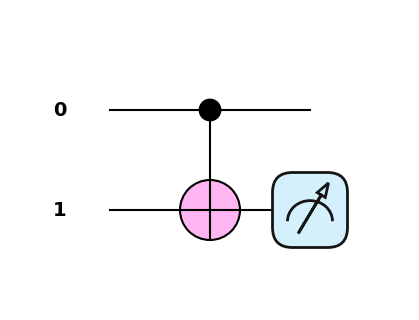

In [5]:
import pennylane as qml

def circ():
    qml.CNOT(wires = [0,1])
    return qml.probs(wires=[1])


qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(circ)()

# consider the circuit above:

* if initial state $\alpha|00\rangle+\beta |11\rangle$ the outcome is $0$ which is associated to $+1$
* if initial state $\alpha|01\rangle+\beta |10\rangle$ the outcome is $1$ which is associated to $-1$
* equivalent to measuring the operator $Z\otimes Z$

# equivalent circuit to fix error

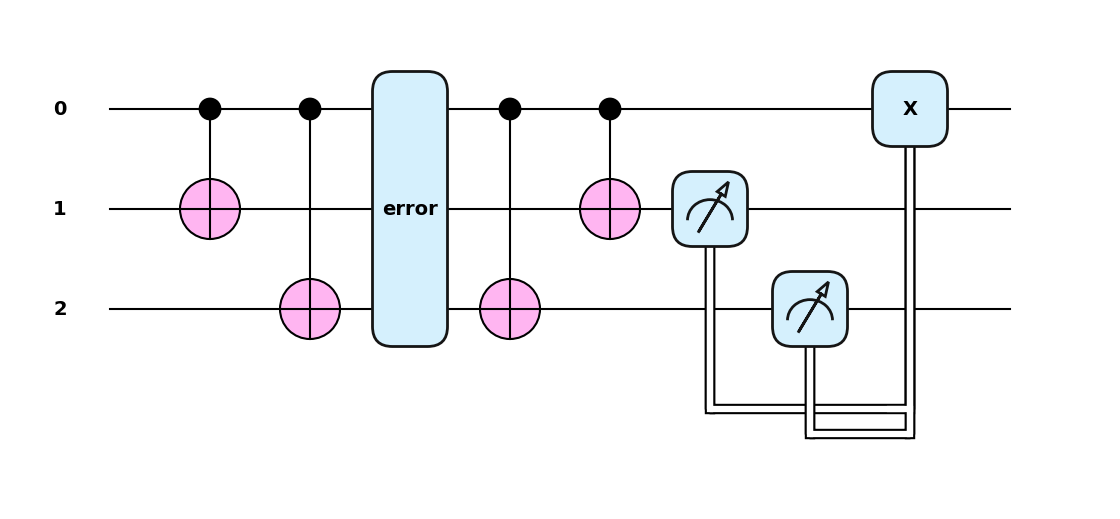

In [16]:
def circ():
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [0,2])
    op = error(wires=[0,1,2])
    qml.CNOT(wires = [0,2])
    qml.CNOT(wires = [0,1])
    m1 = qml.measure(1)
    m2 = qml.measure(2)
    qml.cond(m1 & m2 == 0, qml.X)(wires=0)
    return 0

qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(circ)()

# phase flips error

* the Kraus operators representation
$$\rho →\rho_{out}=\sum_{i=0}^{3}A_i \left(\sigma_i \rho \sigma_i\right)$$

* the Kraus operators for phase flips error

$$A_0 = \sqrt{1-p} \,Id, \quad A_3 = \sqrt{p} \,Z,$$

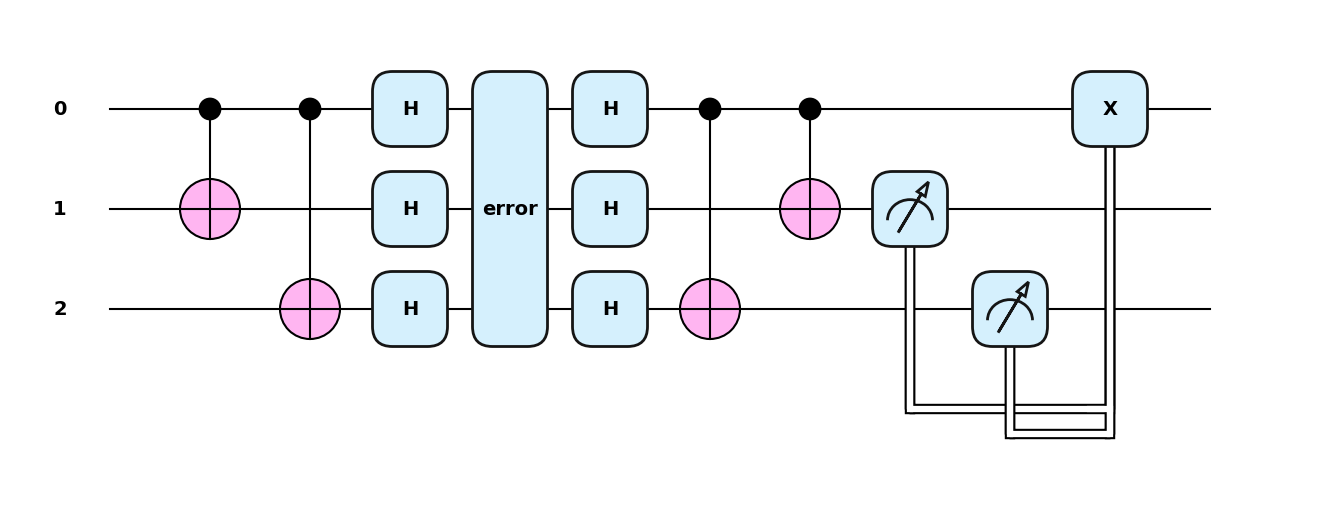

In [18]:
def circ():
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [0,2])
    qml.Hadamard(0)
    qml.Hadamard(1)
    qml.Hadamard(2)
    op = error(wires=[0,1,2])
    qml.Hadamard(0)
    qml.Hadamard(1)
    qml.Hadamard(2)
    qml.CNOT(wires = [0,2])
    qml.CNOT(wires = [0,1])
    m1 = qml.measure(1)
    m2 = qml.measure(2)
    qml.cond(m1 & m2 == 0, qml.X)(wires=0)
    return 0

qml.drawer.use_style('pennylane')
fig, ax = qml.draw_mpl(circ)()

**encoding:**

$$\psi = \alpha |0\rangle + \beta |1\rangle \rightarrow  \alpha |+++\rangle + \beta |---\rangle$$

**encoding:** $|0\rangle_L = |+++\rangle$, $|1\rangle_L = |---\rangle$


# the Shor code

* to correct $X$ error we encode into $\{|000\rangle, |111\rangle\}$
* note that
  * $Z_1|000\rangle \equiv Z\otimes Id \otimes Id|000\rangle = |000\rangle$
  * $Z_2|000\rangle \equiv Id\otimes Z \otimes Id|000\rangle = |000\rangle$
  * $Z_3|000\rangle \equiv Id\otimes Id \otimes Z|000\rangle = |000\rangle$
  * $Z_1|111\rangle  = -|111\rangle$
  * $Z_2|111\rangle = -|111\rangle$
  * $Z_3|111\rangle= -|111\rangle$

* $|p\rangle \propto |000\rangle+|111\rangle, \quad |m\rangle \propto |000\rangle-|111\rangle$
* single flip error map $|p\rangle$ to $|m\rangle$ and vice versa:
  $$Z_1|p\rangle=Z_2|p\rangle=Z_3|p\rangle=|m\rangle\\
  Z_1|m\rangle=Z_2|m\rangle=Z_3|m\rangle=|p\rangle
  $$

* **encoding into nine qubit states** $|0\rangle_L = |ppp\rangle$, $|1\rangle_L = |mmm\rangle$

* the code can correct also $Y = iXZ$ error
* code that correct $X, Y$ and $Z$ errors can correct an arbitrary error on a single qubit

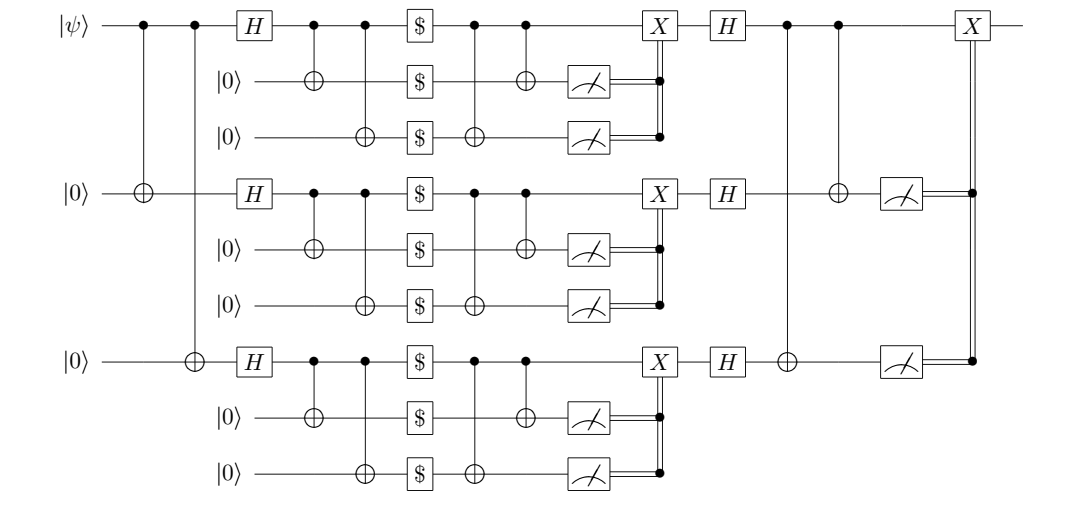